https://sigopt.com/blog/comparison-bayesian-packages-hyperparameter-optimization/  
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html  

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

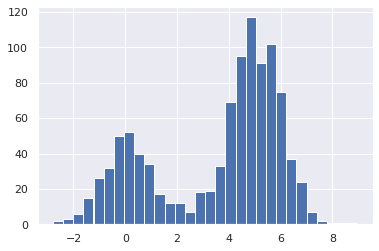

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)
hist = plt.hist(x, bins=30)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity

# bandwidths = 10 ** np.linspace(-1, 1, 100)
# grid = GridSearchCV(KernelDensity(kernel='gaussian'),
#                     {'bandwidth': bandwidths},
#                     cv=LeaveOneOut())
# grid.fit(x[:, None]);
# grid.best_params_ # {'bandwidth': 0.35111917342151316}
# bandwidth=grid.best_params_['bandwidth']
bandwidth=0.35111917342151316

(-0.02, 0.4)

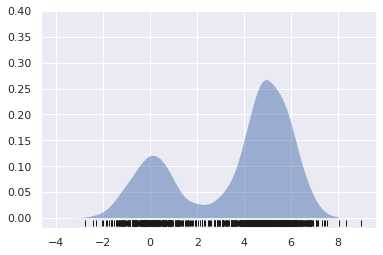

In [4]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
x_d = np.linspace(-4, 8, 1000)
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.4)

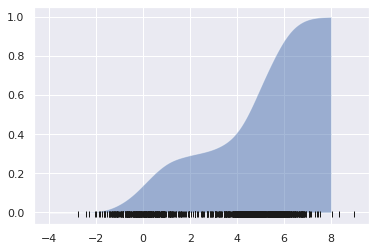

In [21]:
cdf_raw=np.exp(logprob).cumsum()
cdf=cdf_raw/cdf_raw[-1] #normalize
plt.fill_between(x_d, cdf, alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)